# Import Required Libraries
Import necessary libraries such as os, pandas, and json.

In [2]:
# Import necessary libraries
import os  # For file and directory operations
import pandas as pd  # For handling CSV and Excel files
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display



# Initialize Variables

In [3]:
file_path = "data/eea/" 

# Adjust pandas display options to show all rows
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)




# Load data dictionary
More information could be found here https://circabc.europa.eu/sd/a/d9cff59f-5117-48f4-9a37-07b94027110c/MS%20Guidelines%202019

In [4]:
eea_data_dict = pd.read_excel(file_path + "Table-definition.xlsx", sheet_name='Sheet1', header=2)  
eea_data_dict

,Name,Definition,Datatype,Cardinality
0,ID,Identification number.,integer,1..1
1,MS,Member state.,varchar(2),0..1
2,Mp,Manufacturer pooling.,varchar(50),0..1
3,VFN,Vehicle family identification number.,varchar(25),0..1
4,Mh,Manufacturer name EU standard denomination .,varchar(50),0..1
5,Man,Manufacturer name OEM declaration.,varchar(50),0..1
6,MMS,Manufacturer name MS registry denomination .,varchar(125),0..1
7,TAN,Type approval number.,varchar(50),0..1
8,T,Type.,varchar(25),0..1
9,Va,Variant.,varchar(25),0..1


# Load CSV Files
Use pandas' read_csv() function to load and display the contents of a CSV file.

In [5]:
# Load EEA data
#countries = {'AT'}
countries = {'AT','BE','BG','CY','CZ','DE','DK','EE','ES','FI','FR','GB','GR','HR','HU','IE','IT','IS','LT','LU','LV','MT','NL','NO','PL','PT','RO','SE','SI','SK'}

eea_df = pd.DataFrame()
for country in countries:
    print ("Loading " + file_path + country + "10-23F.csv")
    df = pd.read_csv(file_path + country + "10-23F.csv", low_memory=False)
    eea_df = pd.concat([eea_df, df], ignore_index=True)
eea_df.info()

Loading data/eea/IE10-23F.csv
Loading data/eea/EE10-23F.csv
Loading data/eea/IS10-23F.csv
Loading data/eea/HU10-23F.csv
Loading data/eea/NL10-23F.csv
Loading data/eea/GR10-23F.csv
Loading data/eea/IT10-23F.csv
Loading data/eea/SE10-23F.csv
Loading data/eea/SK10-23F.csv
Loading data/eea/SI10-23F.csv
Loading data/eea/FI10-23F.csv
Loading data/eea/BG10-23F.csv
Loading data/eea/DE10-23F.csv
Loading data/eea/BE10-23F.csv
Loading data/eea/CY10-23F.csv
Loading data/eea/AT10-23F.csv
Loading data/eea/NO10-23F.csv
Loading data/eea/HR10-23F.csv
Loading data/eea/ES10-23F.csv
Loading data/eea/FR10-23F.csv
Loading data/eea/CZ10-23F.csv
Loading data/eea/MT10-23F.csv
Loading data/eea/PT10-23F.csv
Loading data/eea/RO10-23F.csv
Loading data/eea/DK10-23F.csv
Loading data/eea/LV10-23F.csv
Loading data/eea/GB10-23F.csv
Loading data/eea/PL10-23F.csv
Loading data/eea/LU10-23F.csv
Loading data/eea/LT10-23F.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80377293 entries, 0 to 80377292
Data columns (tota

# Create initial data profile and merged dictionary

In [6]:

# Step 1: Calculate the percentage of missing values in eea_df
missing_values = eea_df.isnull().sum()
missing_percentage = (missing_values / len(eea_df)) * 100
unique_counts = eea_df.nunique()

# Step 2: Create a DataFrame for eea_df columns with missing percentage
eea_columns = pd.DataFrame({
    'Name': eea_df.columns.str.strip().str.lower(),
    'Missing Percentage': missing_percentage,
    'Unique Counts': unique_counts,
    'Table Data Type': eea_df.dtypes.astype(str).values
})

# Remove multiple columns
eea_data_dict = eea_data_dict.drop(columns=['Cardinality'])

# Step 3: Merge eea_df columns with the data dictionary
eea_df.columns = eea_df.columns.str.lower()
eea_data_dict['Name'] = eea_data_dict['Name'].str.strip().str.lower()
data_profile_and_dictionary = pd.merge(
    eea_columns,
    eea_data_dict,
    how='outer',
    on='Name'
)

# Step 4: Add an indicator column for the column's presence
def column_presence(row):
    if pd.notnull(row['Missing Percentage']) and pd.notnull(row['Definition']):
        return 'In Both'
    elif pd.isnull(row['Missing Percentage']) and pd.notnull(row['Definition']):
        return 'Only in Data Dictionary'
    elif pd.notnull(row['Missing Percentage']) and pd.isnull(row['Definition']):
        return 'Only in eea_df'
    else:
        return 'Unknown'

data_profile_and_dictionary['Presence Indicator'] = data_profile_and_dictionary.apply(column_presence, axis=1)

# Step 5: Display the final table
data_profile_and_dictionary

,Name,Missing Percentage,Unique Counts,Table Data Type,Definition,Datatype,Presence Indicator
0,at1 (mm),15.007902,1773.0,float64,Axle width steering axle.,integer,In Both
1,at2 (mm),15.806740,1518.0,float64,Axle width other axle.,integer,In Both
2,cn,0.193711,75100.0,object,Commercial name.,varchar(50),In Both
3,country,0.000000,30.0,object,NaN,NaN,Only in eea_df
4,cr,6.077789,10.0,object,Category of the vehicle registered.,varchar(5),In Both
5,ct,0.278743,21.0,object,Category of the vehicle type approved.,varchar(5),In Both
6,date of registration,64.315825,1104.0,object,NaN,NaN,Only in eea_df
7,de,97.003139,123.0,float64,Deviation factor.,float,In Both
8,dr,NaN,NaN,NaN,Registration date.,date,Only in Data Dictionary
9,e (g/km),NaN,NaN,NaN,"Specific CO2 Emission. Deprecated value, only ...",float,Only in Data Dictionary


# Update data dictionary with aligned column names
Country = ms
electtric range (km) = zr
fuel consumption = fc
date of registraion  = dr


In [7]:
# Replace specific rows in the 'Name' column of eea_data_dict
replacement_mapping = {
    'ms': 'country',
    'zr': 'electric range (km)',
    'fc' : 'fuel consumption',
    'dr' : 'date of registration'
}

# Replace the values in the 'Name' column
eea_data_dict['Name'] = eea_data_dict['Name'].replace(replacement_mapping)

# Step 3: Merge eea_df columns with the data dictionary
eea_data_dict['Name'] = eea_data_dict['Name'].str.strip().str.lower()
data_profile_and_dictionary = pd.merge(
    eea_columns,
    eea_data_dict,
    how='outer',
    on='Name'
)

# Step 4: Add an indicator column for the column's presence
def column_presence(row):
    if pd.notnull(row['Missing Percentage']) and pd.notnull(row['Definition']):
        return 'In Both'
    elif pd.isnull(row['Missing Percentage']) and pd.notnull(row['Definition']):
        return 'Only in Data Dictionary'
    elif pd.notnull(row['Missing Percentage']) and pd.isnull(row['Definition']):
        return 'Only in eea_df'
    else:
        return 'Unknown'

data_profile_and_dictionary['Presence Indicator'] = data_profile_and_dictionary.apply(column_presence, axis=1)

# Step 5: Display the final table
data_profile_and_dictionary


,Name,Missing Percentage,Unique Counts,Table Data Type,Definition,Datatype,Presence Indicator
0,at1 (mm),15.007902,1773.0,float64,Axle width steering axle.,integer,In Both
1,at2 (mm),15.806740,1518.0,float64,Axle width other axle.,integer,In Both
2,cn,0.193711,75100.0,object,Commercial name.,varchar(50),In Both
3,country,0.000000,30.0,object,Member state.,varchar(2),In Both
4,cr,6.077789,10.0,object,Category of the vehicle registered.,varchar(5),In Both
5,ct,0.278743,21.0,object,Category of the vehicle type approved.,varchar(5),In Both
6,date of registration,64.315825,1104.0,object,Registration date.,date,In Both
7,de,97.003139,123.0,float64,Deviation factor.,float,In Both
8,e (g/km),NaN,NaN,NaN,"Specific CO2 Emission. Deprecated value, only ...",float,Only in Data Dictionary
9,ec (cm3),6.618458,2050.0,float64,Engine capacity.,integer,In Both


# Individual column checks


## 1. Counrties / MS (member state)

,Name,Missing Percentage,Unique Counts,Table Data Type,Definition,Datatype,Presence Indicator
3,country,0.0,30.0,object,Member state.,varchar(2),In Both


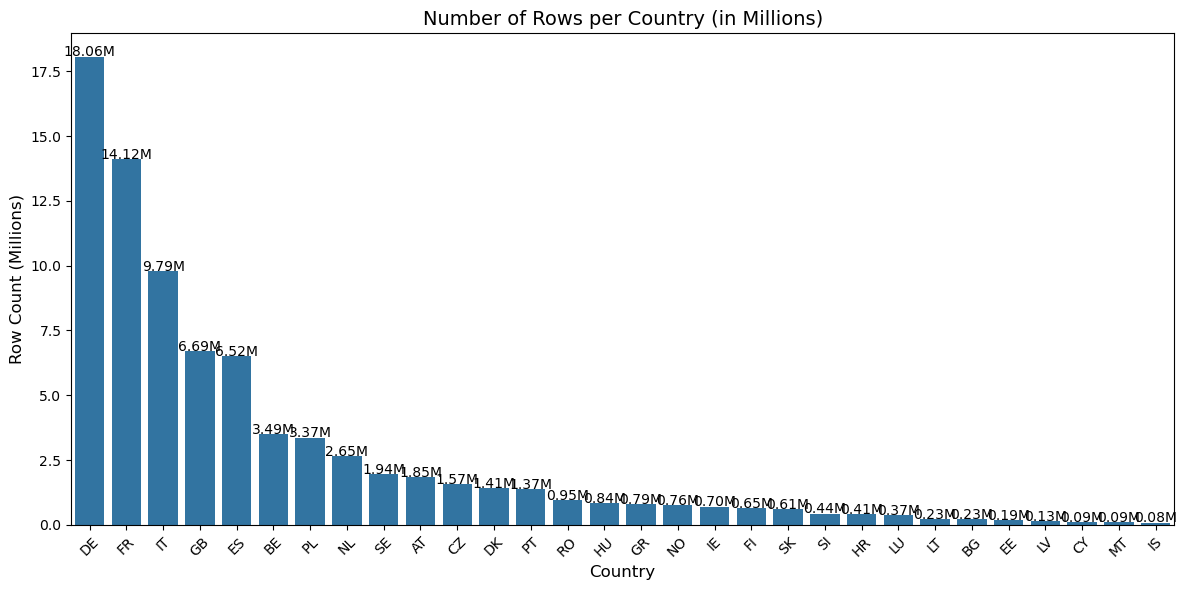

In [8]:
current_columns = ['country']
display(data_profile_and_dictionary[data_profile_and_dictionary['Name'].isin(current_columns)])


# Count the number of rows per country
country_counts = eea_df['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Convert counts to millions
country_counts['Count (Millions)'] = country_counts['Count'] / 1_000_000

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Count (Millions)', data=country_counts)

# Add value annotations on top of the bars
for index, row in country_counts.iterrows():
    plt.text(index, row['Count (Millions)'] + 0.01, f"{row['Count (Millions)']:.2f}M", ha='center', fontsize=10)

# Customize the chart
plt.title('Number of Rows per Country (in Millions)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Row Count (Millions)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

### 1 Country / Member State (MS) Data analyis
- optimal data quality (no null or invalid values)


## 2-3. Year and Registration Date

## Counrties / MS (member state) field analysis
- All records have valid country values.
- No cleaning needed


,Name,Missing Percentage,Unique Counts,Table Data Type,Definition,Datatype,Presence Indicator
6,date of registration,64.315825,1104.0,object,Registration date.,date,In Both
41,year,0.000000,14.0,int64,Reporting year.,integer,In Both


,date of registration,count
0,2023-06-30,104223
1,2023-04-28,103823
2,2023-05-31,102863
3,2021-01-01,102575
4,2023-03-31,101549
...,...,...
1099,2015-01-30,1
1100,2012-10-31,1
1101,2016-02-12,1
1102,2015-05-04,1


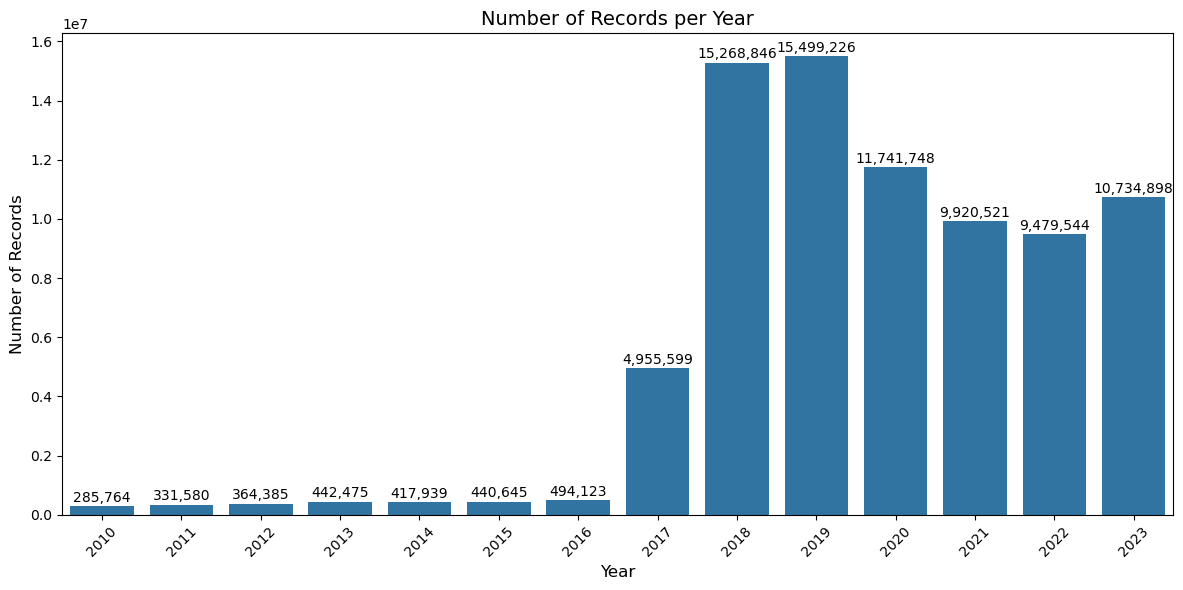

In [9]:
current_columns = ['year','date of registration']
display(data_profile_and_dictionary[data_profile_and_dictionary['Name'].isin(current_columns)])

year_of_registration = eea_df['date of registration'].value_counts().reset_index()
display(year_of_registration)

# Count the number of rows per year
year_counts = eea_df['year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Count']
year_counts = year_counts.sort_values(by='Year')

# Plot the number of records per year
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    x='Year', 
    y='Count', 
    data=year_counts
)

# Add value annotations on top of the bars
for i, row in enumerate(year_counts.itertuples()):
    plt.text(
        x=i,  # Use the index of the bar
        y=row.Count + 0.01 * max(year_counts['Count']),  # Slightly above the bar
        s=f"{row.Count:,}",  # Format the number with commas
        ha='center', 
        fontsize=10
    )

# Customize the chart
plt.title('Number of Records per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

### 2-3 Year and Registration date analysis
- year data is clean
- Registrarion date is not interesting in the context of CO2 emmisions, year is enough granularity. To be be dropped.

## 4 Fuel Type


In [10]:
current_columns = ['ft']

display(data_profile_and_dictionary[data_profile_and_dictionary['Name'].isin(current_columns)])
print('Fuel Type Value counts:')
display(eea_df['ft'].value_counts())

#make case neutral and(initial cleaning) and strip leading/trailing spaces
eea_df['fuel type'] = eea_df['ft'].str.upper().str.strip()
print('Updated Fuel Type Value counts: (afer initial cleaning)')
display(eea_df['fuel type'].value_counts())
unique_count = eea_df['fuel type'].nunique()
print(f"Number of unique values: {unique_count}")

,Name,Missing Percentage,Unique Counts,Table Data Type,Definition,Datatype,Presence Indicator
19,ft,0.051226,58.0,object,Fuel type.,varchar(25),In Both


Fuel Type Value counts:


ft
petrol                       21144786
PETROL                       18726944
DIESEL                        9552983
diesel                        8798562
Petrol                        6440503
Diesel                        5058667
electric                      3292123
petrol/electric               1848791
ELECTRIC                      1813763
PETROL/ELECTRIC               1524300
lpg                            706656
LPG                            604361
NG                             148591
Electric                       113943
Petrol/Electric                100336
DIESEL/ELECTRIC                 99761
e85                             92520
diesel/electric                 85637
ng                              76115
NG-BIOMETHANE                   21624
ng-biomethane                   18135
E85                             15214
NG-biomethane                   12601
DIESEL                           9441
PETROL                           4649
Diesel/Electric                  4501
unknown  

Updated Fuel Type Value counts: (afer initial cleaning)


fuel type
PETROL             46317000
DIESEL             23419653
ELECTRIC            5219992
PETROL/ELECTRIC     3473427
LPG                 1311286
NG                   224706
DIESEL/ELECTRIC      189995
E85                  107734
NG-BIOMETHANE         52567
PETROL-ELECTRIC        6253
HYDROGEN               4258
UNKNOWN                2921
                       2679
CNG                    2476
DIESEL-ELECTRIC        1001
BIODIESEL                93
HYBRID/PETROL/E          44
PETROL PHEV              20
OTHER                    10
GNL                       2
PETROL-GAS                1
NG_BIOMETHANE             1
Name: count, dtype: int64

Number of unique values: 22


### 4 Fuel Type Analysis
- good data availability
- after making case neutral and stripping leading/trailing spaces
- further data cleaning and grouping is needed

##  5 Fuel Mode
Reference: https://circabc.europa.eu/sd/a/d9cff59f-5117-48f4-9a37-07b94027110c/MS%20Guidelines%202019

For the fuel mode the permitted entries are:
- "M" for mono-fuel vehicles, i.e. vehicles able to run on only one fuel, either petrol,
diesel, LPG, natural gas (NG) or hydrogen. The latter category also covers Fuel Cell
electric vehicles, i.e. vehicles equipped with a powertrain containing exclusively fuel
cell(s) and electric machine(s) as propulsion energy converter(s).
- "B" for bi-fuel vehicles, i.e. vehicles with two separate fuel storage systems, which are
designed to run primarily on only one fuel at a time. This covers vehicles that can run on
petrol and either LPG, NG/biomethane or hydrogen.
- “F” for flex-fuel vehicles, i.e. vehicles with one fuel storage system that can run on
different mixtures of two or more fuels; this concerns more specifically ‘flex fuel ethanol
vehicles’, which can run on petrol or a mixture of petrol and ethanol up to an 85 per cent
ethanol blend (E85);
- "E" for battery electric vehicles (BEV), i.e. "pure" electric vehicles (NOT hybrid
vehicles). These vehicles can be identified using section 23 of the certificate of
conformity.
- “P” for Off vehicle charging hybrid electric vehicles (OVC-HEV), i.e. plug-in hybrid
vehicles. These vehicles can be identified using section 23.1 of the certificate of
conformity. Their weighted average CO2 values are specified in section 49.1. (NEDC)
and section 49.4 (WLTP) of the certificate of conformity.
- “H” for Not-Off vehicle charging hybrid electric vehicles (NOVC-HEV). These vehicles
can be identified using section 23.1 of the certificate of conformity. They cannot take
electric energy from external sources and are only fuelled with one of fuel types
specified in section 26 of the CoC. The CO2 values for that fuel shall be reported.

In [11]:
current_columns = ['fm']   
display(data_profile_and_dictionary[data_profile_and_dictionary['Name'].isin(current_columns)])
print('Fuel Mode Value counts:')
display(eea_df['fm'].value_counts())


#make case neutral and(initial cleaning) and strip leading/trailing spaces
eea_df['fuel mode'] = eea_df['fm'].str.upper().str.strip()
print('Updated Fuel Mode Value counts: (afer making case neutral)')
display(eea_df['fuel mode'].value_counts())
unique_count = eea_df['fuel mode'].nunique()   
print(f"Updated Number of unique values: {unique_count}")


,Name,Missing Percentage,Unique Counts,Table Data Type,Definition,Datatype,Presence Indicator
18,fm,0.104873,12.0,object,Fuel mode.,varchar(1),In Both


Fuel Mode Value counts:


fm
M                            61185269
H                             8968677
E                             5214918
P                             3477842
B                             1390082
F                               47688
b                                4616
na                               2453
M                                 702
n                                 700
2                                  51
Alimentazione Sconosciuta           1
Name: count, dtype: int64

Updated Fuel Mode Value counts: (afer making case neutral)


fuel mode
M                            61185971
H                             8968677
E                             5214918
P                             3477842
B                             1394698
F                               47688
NA                               2453
N                                 700
2                                  51
ALIMENTAZIONE SCONOSCIUTA           1
Name: count, dtype: int64

Updated Number of unique values: 10


In [12]:
# Create a cross-tabulation between 'fuel type' and 'fuel mode'
fuel_correlation = pd.crosstab(eea_df['fuel type'], eea_df['fuel mode'])

# Display the cross-tabulation
print("Correlation between Fuel Type and Fuel Mode:")
display(fuel_correlation)

# Optionally, normalize the table to show percentages
fuel_correlation_normalized = pd.crosstab(eea_df['fuel type'], eea_df['fuel mode'], normalize='index')
print("Normalized Correlation (Row Percentages):")
display(fuel_correlation_normalized)

Correlation between Fuel Type and Fuel Mode:


fuel mode,2,ALIMENTAZIONE SCONOSCIUTA,B,E,F,H,M,N,NA,P
fuel type,,,,,,,,,,
BIODIESEL,0,0,0,0,83,0,10,0,0,0
CNG,0,0,0,0,0,0,2476,0,0,0
DIESEL,44,0,180,0,5150,1502037,21885127,356,860,0
DIESEL-ELECTRIC,0,0,0,0,0,0,965,0,8,0
DIESEL/ELECTRIC,0,0,0,0,0,0,5364,0,0,184631
E85,0,0,9,0,42405,65194,25,0,0,0
ELECTRIC,0,0,541,5214811,0,0,4529,0,0,0
GNL,0,0,2,0,0,0,0,0,0,0
HYBRID/PETROL/E,0,0,0,0,0,0,44,0,0,0


Normalized Correlation (Row Percentages):


fuel mode,2,ALIMENTAZIONE SCONOSCIUTA,B,E,F,H,M,N,NA,P
fuel type,,,,,,,,,,
BIODIESEL,0.000000e+00,0.000000,0.000000,0.000000,8.924731e-01,0.000000e+00,0.107527,0.000000,0.000000,0.000000
CNG,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000
DIESEL,1.880844e-06,0.000000,0.000008,0.000000,2.201442e-04,6.420675e-02,0.935512,0.000015,0.000037,0.000000
DIESEL-ELECTRIC,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.991778,0.000000,0.008222,0.000000
DIESEL/ELECTRIC,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.028232,0.000000,0.000000,0.971768
E85,0.000000e+00,0.000000,0.000084,0.000000,3.939777e-01,6.057064e-01,0.000232,0.000000,0.000000,0.000000
ELECTRIC,0.000000e+00,0.000000,0.000104,0.999029,0.000000e+00,0.000000e+00,0.000868,0.000000,0.000000,0.000000
GNL,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
HYBRID/PETROL/E,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000


### 5 Fuel Model Data Analysis
Fuel mode can be used to correctly identify electric vehicles (EVs) and plug-in hybrid electric vehicles (PHEVs) and other hybrid types in the dataset.

##  Type approval number (TAN)


In [18]:
current_columns = ['tan']
display(data_profile_and_dictionary[data_profile_and_dictionary['Name'].isin(current_columns)])
print('Type of Acquisition Value counts:')
display(eea_df['tan'].value_counts())

eea_df[current_columns].head()

,Name,Missing Percentage,Unique Counts,Table Data Type,Definition,Datatype,Presence Indicator
34,tan,0.860537,57599.0,object,Type approval number.,varchar(50),In Both


Type of Acquisition Value counts:


tan
E2*2001/116*0327*88      303254
e2*2007/46*0070*39       284193
e3*2007/46*0064*53       227331
e2*2001/116*0327*83      216346
E2*2007/46*0639*08       189893
                          ...  
E6*NIV18/858*M00803           1
E6*NIV18/858*M02668           1
E6*NIV18/858*M50612           1
E6*NIV18/858*M03595           1
E20*KS18/858*00038*00         1
Name: count, Length: 57599, dtype: int64

,tan
0,e4*2007/46*1018*07
1,E2*2001/116*0314*88
2,e9*2007/46*3142*08
3,E2*2001/116*0314*88
4,e9*2007/46*3142*08


###  Type approval number (TAN) Data Analysis
- good data avaialability
- may not be relevant or usefull for the project

## Type (T), Variant (Va) and Version (Ve)

https://circabc.europa.eu/sd/a/d9cff59f-5117-48f4-9a37-07b94027110c/MS%20Guidelines%202019
These three parameters allow identifying the data relating to the same version of the vehicle
delivered from different Member States. A correct recording of the combined TVV code is
important for allowing the verification by the EEA and the manufacturers of the data. The T,
Va and Ve entries are set out in section 0.2 of the certificate of conformity or section 0.2.2. for
the base vehicle in case of multistage vans (MSV). 

In [32]:
current_columns = ['t','va','ve']
display(data_profile_and_dictionary[data_profile_and_dictionary['Name'].isin(current_columns)])


,Name,Missing Percentage,Unique Counts,Table Data Type,Definition,Datatype,Presence Indicator
33,t,0.099602,23080.0,object,Type.,varchar(25),In Both
35,va,0.271547,61500.0,object,Variant.,varchar(25),In Both
36,ve,0.412684,165357.0,object,Version.,varchar(35),In Both


### Type (T), Variant (Va) and Version (Ve) data analysis
- good data availability
- vehicle identifier, maybe useful for model grouping/ identification

## Category of the vehicle registered (Cr) 
The vehicle category registered is indicated in point J of Part I of the Registration Certificate.
It is the vehicle category registered that determines whether a vehicle is considered as
M1 or N1 for the purpose of the CO2 emission standards

In [41]:
current_columns = ['cr']
display(data_profile_and_dictionary[data_profile_and_dictionary['Name'].isin(current_columns)])
#make case neutral and(initial cleaning) and strip leading/trailing spaces
eea_df['cr'] = eea_df['cr'].str.upper().str.strip()
print('Updated Fuel Mode Value counts: (afer making case neutral)')
display(eea_df['cr'].nunique())
display(eea_df['cr'].value_counts())

,Name,Missing Percentage,Unique Counts,Table Data Type,Definition,Datatype,Presence Indicator
4,cr,6.077789,10.0,object,Category of the vehicle registered.,varchar(5),In Both


Updated Fuel Mode Value counts: (afer making case neutral)


6

cr
M1     73048705
M1G     2438543
           4847
M1S          22
N1G          13
N1            1
Name: count, dtype: int64

### Category of the vehicle registered (Cr) data analysis
- indicator if the vehicle is car or 
- good data availability
- to be further cleaned
- null values to ba assinge as cars

## Category of the vehicle type approved (Ct)
The vehicle category type approved (M1, N1 etc.) is set out in section 0.4 of the certificate of
conformity. It should be noted that a vehicle may be type approved in one category and
registered in another.

In [40]:
current_columns = ['ct']
display(data_profile_and_dictionary[data_profile_and_dictionary['Name'].isin(current_columns)])
#make case neutral and(initial cleaning) and strip leading/trailing spaces
eea_df['ct'] = eea_df['ct'].str.upper().str.strip()
print('Updated Fuel Mode Value counts: (afer making case neutral)')
eea_df[current_columns].nunique()
eea_df['ct'].value_counts()

,Name,Missing Percentage,Unique Counts,Table Data Type,Definition,Datatype,Presence Indicator
5,ct,0.278743,21.0,object,Category of the vehicle type approved.,varchar(5),In Both


Updated Fuel Mode Value counts: (afer making case neutral)


ct
M1        77448913
M1G        2694718
N1            9273
N1G            143
N2             141
N3              27
N2G             11
                 7
L                7
M1S              3
N3G              1
M2               1
MASTER           1
N1 INC           1
Name: count, dtype: int64

### Category of the vehicle type approved (Ct) data analysis
- indicator if the vehicle is car or van or other
- good data availability
- to be dropped as cr is the basis for categoriztion for CO2 emission reporing

## Registrations (r)
Following the introduction of the VIN based data monitoring, the data entry for this field will
by default be '1' since each vehicle will be reported separately. 

In [45]:
current_columns = ['r']
display(data_profile_and_dictionary[data_profile_and_dictionary['Name'].isin(current_columns)])

eea_df[current_columns].value_counts()


,Name,Missing Percentage,Unique Counts,Table Data Type,Definition,Datatype,Presence Indicator
30,r,0.0,4947.0,int64,Total new registrations.,integer,In Both


r    
1        78660775
2          341694
3          190009
4          128121
5           94767
           ...   
4077            1
4071            1
4064            1
4059            1
59092           1
Name: count, Length: 4947, dtype: int64

### Registrations (r) data analysis
- optimal data availability
- no further cleanup needed

## 6 - 10 Manufacturer fields


In [14]:
current_columns = ['man','mh','mk','mms','mp']
display(data_profile_and_dictionary[data_profile_and_dictionary['Name'].isin(current_columns)])

display(eea_df[current_columns])
for col in current_columns:
    eea_df[col].str.upper().str.strip()
    print(f'Number of unique values in {col}:')
    display(eea_df[col].nunique())


,Name,Missing Percentage,Unique Counts,Table Data Type,Definition,Datatype,Presence Indicator
24,man,0.000919,532.0,object,Manufacturer name OEM declaration.,varchar(50),In Both
25,mh,0.000000,265.0,object,Manufacturer name EU standard denomination .,varchar(50),In Both
26,mk,0.158953,1328.0,object,Make.,varchar(25),In Both
27,mms,40.238036,10384.0,object,Manufacturer name MS registry denomination .,varchar(125),In Both
28,mp,7.806911,52.0,object,Manufacturer pooling.,varchar(50),In Both


,man,mh,mk,mms,mp
0,KIA MOTORS CORPORATION,KIA,Kia,KIA,KIA
1,AUTOMOBILE DACIA SA,DACIA,DACIA,DACIA,RENAULT
2,FORD-WERKE GMBH,FORD WERKE GMBH,FORD,Ford,FORD-WERKE GMBH
3,AUTOMOBILE DACIA SA,DACIA,DACIA,DACIA,RENAULT
4,FORD-WERKE GMBH,FORD WERKE GMBH,FORD,Ford,FORD-WERKE GMBH
...,...,...,...,...,...
80377288,VOLVO CAR CORPORATION,VOLVO,VOLVO,NaN,NaN
80377289,VOLVO CAR CORPORATION,VOLVO,VOLVO,NaN,NaN
80377290,VOLVO CAR CORPORATION,VOLVO,VOLVO,NaN,NaN
80377291,VOLVO CAR CORPORATION,VOLVO,VOLVO,NaN,NaN


Number of unique values in man:


532

Number of unique values in mh:


265

Number of unique values in mk:


1328

Number of unique values in mms:


10384

Number of unique values in mp:


52

### 6-10 Manufacturer Fields
- the fields can be merged and create a single field universal field for manufacturers 

In [ ]:
current_columns = ['t']
display(data_profile_and_dictionary[data_profile_and_dictionary['Name'].isin(current_columns)])
print('Type Value counts:')

display(eea_df['t'].value_counts())

,Name,Missing Percentage,Unique Counts,Table Data Type,Definition,Datatype,Presence Indicator
33,t,0.099602,23080.0,object,Type.,varchar(25),In Both


Type Value counts:


t
U                2736931
312              2111366
R                1488656
M                1431705
SD               1317440
                  ...   
3840-P014              1
3840-P018              1
3840-P022              1
3840-P028              1
IS35SC2AA/CV9          1
Name: count, Length: 23080, dtype: int64

## Commerical Name (cn)

In [27]:
current_columns = ['cn']
display(data_profile_and_dictionary[data_profile_and_dictionary['Name'].isin(current_columns)])
# Clean the 'cn' column by stripping leading/trailing spaces and converting to uppercase
eea_df['cn'] = eea_df['cn'].str.strip().str.upper()
print('Unique Commercial  Names Value counts after cleaning:')
display(eea_df[current_columns].nunique())
display(eea_df[current_columns].value_counts())

,Name,Missing Percentage,Unique Counts,Table Data Type,Definition,Datatype,Presence Indicator
2,cn,0.193711,75100.0,object,Commercial name.,varchar(50),In Both


Unique Commercial  Names Value counts after cleaning:


cn    72577
dtype: int64

cn                       
CLIO                         1705489
GOLF                         1549529
208                          1334442
SANDERO                      1296622
C3                           1079465
                              ...   
Q5 QUATTRO 2.0 TFSI - USA          1
Q5 QUATTRO 2.0 TFSI                1
CRAFTER PMR REHATRANS              1
Q5 ADVANCED                        1
‘‘                                 1
Name: count, Length: 72577, dtype: int64

### Commercial Name (cn) analysis
- Model Name
- Inconsistent naming, sometimes with details of the trim  sometimes wihtout
- Further processing needed - split into at least 2 fields, (1) Model Name (2) Trim Name

## Mass in running order (m)
Mass in running order (m) is used for the calculation of the specific emission target of a
manufacturer.
16
Mass in running order refers to the mass of the vehicle with bodywork in running order, i.e.
the vehicle with its fuel tank(s) filled to at least 90 % of its or their capacity/ies, including the
mass of the driver, of the fuel and liquids, fitted with the standard equipment in accordance
with the manufacturer’s specifications and, when they are fitted, the mass of the bodywork,
the cabin, the coupling and the spare wheel(s) as well as the tools (Regulation (EU) No
1230/2012).

In [46]:
current_columns = ['m']
display(data_profile_and_dictionary[data_profile_and_dictionary['Name'].isin(current_columns)])

,Name,Missing Percentage,Unique Counts,Table Data Type,Definition,Datatype,Presence Indicator


## Axel width

,Name,Missing Percentage,Unique Counts,Table Data Type,Definition,Datatype,Presence Indicator
0,at1 (mm),15.007902,1773.0,float64,Axle width steering axle.,integer,In Both
1,at2 (mm),15.806740,1518.0,float64,Axle width other axle.,integer,In Both


Summary Statistics:
           at1 (mm)      at2 (mm)
count  6.831435e+07  6.767226e+07
mean   1.556383e+03  1.544214e+03
std    1.249241e+02  6.490879e+01
min    0.000000e+00  0.000000e+00
25%    1.509000e+03  1.504000e+03
50%    1.550000e+03  1.547000e+03
75%    1.580000e+03  1.580000e+03
max    1.585100e+04  1.583000e+04
Correlation between 'at1 (mm)' and 'at2 (mm)': 0.4385076062840654
Column 'at1 (mm)' has 1813161 outliers.


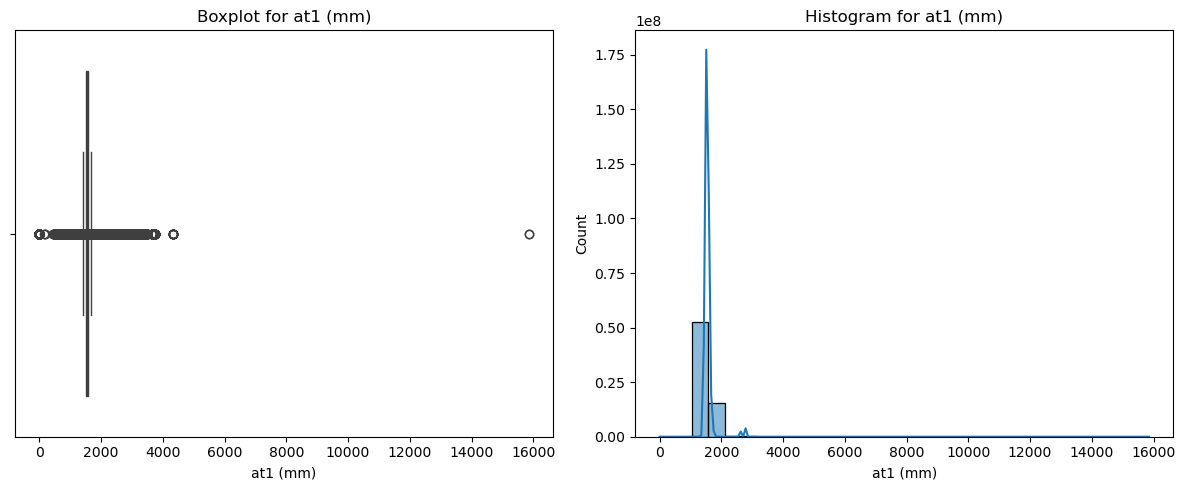

Column 'at2 (mm)' has 946205 outliers.


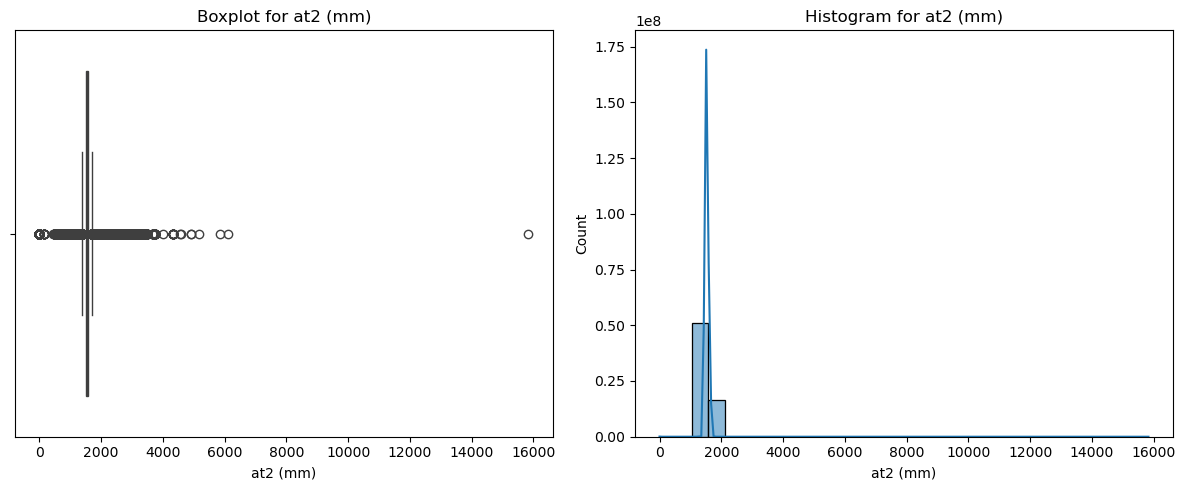

In [16]:
current_columns = ['at1 (mm)', 'at2 (mm)']
display(data_profile_and_dictionary[data_profile_and_dictionary['Name'].isin(current_columns)])


# Summary statistics for at1 (mm) and at2 (mm)
summary_stats = eea_df[current_columns].describe()
print("Summary Statistics:")
print(summary_stats)

# Correlation between at1 (mm) and at2 (mm)
correlation = eea_df['at1 (mm)'].corr(eea_df['at2 (mm)'])
print(f"Correlation between 'at1 (mm)' and 'at2 (mm)': {correlation}")

# Detect outliers using IQR and plot boxplot and histogram
for col in current_columns:
    Q1 = eea_df[col].quantile(0.25)
    Q3 = eea_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = eea_df[(eea_df[col] < (Q1 - 1.5 * IQR)) | (eea_df[col] > (Q3 + 1.5 * IQR))]
    print(f"Column '{col}' has {len(outliers)} outliers.")
    
    # Create a 1x2 subplot for boxplot and histogram
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Boxplot
    sns.boxplot(x=eea_df[col], ax=axes[0])
    axes[0].set_title(f"Boxplot for {col}")
    axes[0].set_xlabel(col)
    
    # Histogram
    sns.histplot(eea_df[col], kde=True, ax=axes[1], bins=30)
    axes[1].set_title(f"Histogram for {col}")
    axes[1].set_xlabel(col)
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()



## Axel width data analysis

- Good data availability
- Data clean-up needed for extreme outliers